In [661]:
import numpy as np
import pprint as pp
from matplotlib import pyplot as plt
import shutil
import os
import copy
from IPython.display import clear_output

In [662]:
FILENAME = 'kroB200.tsp'

In [663]:

def read_data_file(file_name):
    tsp_data = {}
    with open(FILENAME, 'r') as file:
        for line in file:
            if line.startswith('EOF'):
                break
            if line.startswith('DIMENSION'):
                tsp_data['DIMENSION'] = int(line.split()[1])
            parts = line.split()
            if parts[0].isdigit():
                node, x, y = map(int, parts)
                tsp_data[node] = (x, y)

    return tsp_data

def calculate_distance_matrix(tsp_data):
    N = tsp_data['DIMENSION']
    tsp_data.pop('DIMENSION')

    distance_matrix = [[0 for _ in range(N + 1)] for _ in range(N + 1)]
    for node in tsp_data:
        x1, y1 = tsp_data[node]
        for other_node in tsp_data:
            if node == other_node:
                continue
            else:
                x2, y2 = tsp_data[other_node]
                distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
                distance = round(distance, 2)
                distance_matrix[node][other_node] = distance
                distance_matrix[other_node][node] = distance
    return distance_matrix

def print_distance_matrix(distance_matrix):
    for row in distance_matrix:
        print(row)

In [664]:
data = read_data_file('kroA100.tsp')
distance = calculate_distance_matrix(data)
print_distance_matrix(distance)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2606.93, 548.51, 2009.49, 1367.89, 2233.32, 1130.63, 580.68, 515.2, 582.07, 721.5, 262.86, 2790.41, 2301.46, 2489.77, 2438.9, 2948.69, 2589.15, 3007.58, 783.17, 258.09, 1980.49, 1987.9, 2459.22, 526.54, 1184.12, 661.79, 814.32, 492.32, 881.46, 3069.99, 439.72, 2432.88, 838.3, 843.98, 2910.25, 1129.45, 698.55, 1123.95, 1099.94, 3098.67, 2516.9, 1673.26, 3350.02, 2850.51, 477.25, 1487.58,

In [665]:
def plot_cities(data):
    x = []
    y = []
    for city in data:
        x.append(data[city][0])
        y.append(data[city][1])
    plt.scatter(x, y)
    plt.show()

def plot_cycles(cycle1, cycle2, tsp_data):
    x = []
    y = []
    for city in cycle1:
        x.append(tsp_data[city][0])
        y.append(tsp_data[city][1])
    x.append(tsp_data[cycle1[0]][0])
    y.append(tsp_data[cycle1[0]][1])
    plt.plot(x, y, 'ro-')

    x = []
    y = []
    for city in cycle2:
        x.append(tsp_data[city][0])
        y.append(tsp_data[city][1])
    x.append(tsp_data[cycle2[0]][0])
    y.append(tsp_data[cycle2[0]][1])
    plt.plot(x, y, 'bo-')

    plt.show()

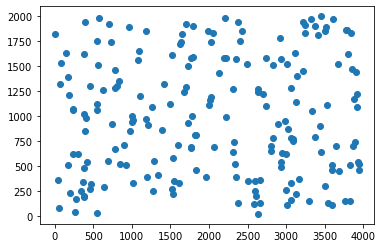

In [666]:
plot_cities(data)

In [667]:
def get_nodes(tsp_data):
    nodes = []
    for node in tsp_data:
        if node != 'DIMENSION':
            nodes.append(node)
    return nodes

In [668]:
def random_cycle(nodes):
    nodes = copy.deepcopy(nodes)
    np.random.shuffle(nodes)
    half = len(nodes) // 2
    cycle1 = nodes[:half]
    cycle2 = nodes[half:]
    
    return cycle1, cycle2

In [669]:
def swap_nodes_between_cycles(cycle1, cycle2, a_index, b_index):
    cycle1 = copy.deepcopy(cycle1)
    cycle2 = copy.deepcopy(cycle2)

    tmp = cycle2[b_index]
    cycle2[b_index] = cycle1[a_index]
    cycle1[a_index] = tmp

    return cycle1, cycle2


def swap_edge_within_cycle(cycle, a_index, b_index):
    cycle = copy.deepcopy(cycle)
    
    b_index = (b_index + 1) % (len(cycle) + 1)
    # if a_index > b_index:
    #     a_index, b_index = b_index, a_index
    cycle[a_index:b_index] = cycle[a_index:b_index][::-1]
    return cycle

In [670]:
SWAP_NODES_BETWEEN = 0
SWAP_EDGES_WITHIN_CYCLE_1 = 1
SWAP_EDGES_WITHIN_CYCLE_2 = 2

def generate_moves(cycle):

    moves = []
    N = len(cycle)

    # generate edges
    for i in range(2, N-1):
        for j in range(N):
            k = (j + i) % (N)
            if j < k:
                moves.append((SWAP_EDGES_WITHIN_CYCLE_1, (j, k)))


    # generate edges
    for i in range(2, N-1):
        for j in range(N):
            k = (j + i) % (N)
            if j < k:
                moves.append((SWAP_EDGES_WITHIN_CYCLE_2, (j, k)))

    # generate nodes
    for i in range(N):
        for j in range(N):
                moves.append((SWAP_NODES_BETWEEN, (i, j)))
    
    # shuffle moves
    #np.random.shuffle(moves)
    return moves

In [671]:

def apply_move(move, cycle1, cycle2):
    move_type, (a, b) = move
    
    if move_type == SWAP_NODES_BETWEEN:
        cycle1, cycle2 = swap_nodes_between_cycles(cycle1, cycle2, a, b)

    elif move_type == SWAP_EDGES_WITHIN_CYCLE_1:
        cycle1 = swap_edge_within_cycle(cycle1, a, b)

    elif move_type == SWAP_EDGES_WITHIN_CYCLE_2:
        cycle2 = swap_edge_within_cycle(cycle2, a, b)

    return cycle1, cycle2

In [672]:
cycle2 = [7, 8, 9, 10, 11]
cycle = [1, 2, 3, 4, 5]
moves = generate_moves(cycle)

print(cycle, cycle2)
for move in moves:
    cycle, cycle2 = apply_move(move, cycle, cycle2)
    print(move, cycle, cycle2)


[1, 2, 3, 4, 5] [7, 8, 9, 10, 11]
(1, (0, 2)) [3, 2, 1, 4, 5] [7, 8, 9, 10, 11]
(1, (1, 3)) [3, 4, 1, 2, 5] [7, 8, 9, 10, 11]
(1, (2, 4)) [3, 4, 5, 2, 1] [7, 8, 9, 10, 11]
(1, (0, 3)) [2, 5, 4, 3, 1] [7, 8, 9, 10, 11]
(1, (1, 4)) [2, 1, 3, 4, 5] [7, 8, 9, 10, 11]
(2, (0, 2)) [2, 1, 3, 4, 5] [9, 8, 7, 10, 11]
(2, (1, 3)) [2, 1, 3, 4, 5] [9, 10, 7, 8, 11]
(2, (2, 4)) [2, 1, 3, 4, 5] [9, 10, 11, 8, 7]
(2, (0, 3)) [2, 1, 3, 4, 5] [8, 11, 10, 9, 7]
(2, (1, 4)) [2, 1, 3, 4, 5] [8, 7, 9, 10, 11]
(0, (0, 0)) [8, 1, 3, 4, 5] [2, 7, 9, 10, 11]
(0, (0, 1)) [7, 1, 3, 4, 5] [2, 8, 9, 10, 11]
(0, (0, 2)) [9, 1, 3, 4, 5] [2, 8, 7, 10, 11]
(0, (0, 3)) [10, 1, 3, 4, 5] [2, 8, 7, 9, 11]
(0, (0, 4)) [11, 1, 3, 4, 5] [2, 8, 7, 9, 10]
(0, (1, 0)) [11, 2, 3, 4, 5] [1, 8, 7, 9, 10]
(0, (1, 1)) [11, 8, 3, 4, 5] [1, 2, 7, 9, 10]
(0, (1, 2)) [11, 7, 3, 4, 5] [1, 2, 8, 9, 10]
(0, (1, 3)) [11, 9, 3, 4, 5] [1, 2, 8, 7, 10]
(0, (1, 4)) [11, 10, 3, 4, 5] [1, 2, 8, 7, 9]
(0, (2, 0)) [11, 10, 1, 4, 5] [3, 2, 8, 7, 9]


In [673]:
def calculate_cycles_length(cycle1, cycle2, distance_matrix):
    c = [cycle1, cycle2]
    total_length = 0
    for cycle in c:
        length = 0
        for i in range(len(cycle)):
            length += distance_matrix[cycle[i-1]][cycle[i]]
        total_length += length

    return total_length

In [674]:
def local_search_greedy(cycle1, cycle2, distance):

    cycle1 = copy.deepcopy(cycle1)
    cycle2 = copy.deepcopy(cycle2)

    moves = generate_moves(cycle1)


    iter = 0
    while True:

        best_move = None
        best_delta = 0
  
        iter += 1

        for move in moves:

            subdistance_before = 0
            subdistance_after = 0

            move_type, (A, B) = move

            if move_type == SWAP_NODES_BETWEEN:
                a = cycle1[A]
                b = cycle2[B]

                a_prev = cycle1[(A-1) % len(cycle1)]
                a_next = cycle1[(A+1) % len(cycle1)]

                b_prev = cycle2[(B-1) % len(cycle2)]
                b_next = cycle2[(B+1) % len(cycle2)]

                subdistance_before += distance[a_prev][a] + distance[a][a_next] + distance[b_prev][b] + distance[b][b_next]
                subdistance_after += distance[a_prev][b] + distance[b][a_next] + distance[b_prev][a] + distance[a][b_next]

            elif move_type == SWAP_EDGES_WITHIN_CYCLE_1:
                a = cycle1[A]
                b = cycle1[B]

                a_prev = cycle1[(A-1) % len(cycle1)]
                b_next = cycle1[(B+1) % len(cycle1)]

                subdistance_before += distance[a_prev][a] + distance[b][b_next]
                subdistance_after += distance[a_prev][b] + distance[a][b_next]

            elif move_type == SWAP_EDGES_WITHIN_CYCLE_2:

                a = cycle2[A]
                b = cycle2[B]

                a_prev = cycle2[(A-1) % len(cycle2)]
                b_next = cycle2[(B+1) % len(cycle2)]

                subdistance_before += distance[a_prev][a] + distance[b][b_next]
                subdistance_after += distance[a_prev][b] + distance[a][b_next]


            delta = subdistance_after - subdistance_before

            if delta < best_delta:
                best_move = move
                best_delta = delta
                

        if best_delta < 0:
            # print("Stosuję ruch: ", best_move)
            cycle1, cycle2 = apply_move(best_move, cycle1, cycle2)
            if iter % 5 == 0:
                clear_output(wait=True)
                plot_cycles(cycle1, cycle2, data)
        elif best_move is None:
            break

    return cycle1, cycle2


342781.10000000003


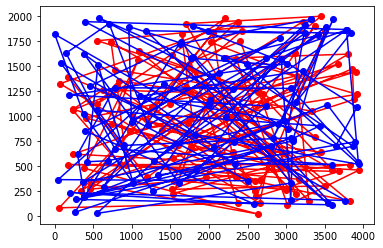

In [675]:
random_cycle1, random_cycle2 = random_cycle(get_nodes(data))

print(calculate_cycles_length(random_cycle1, random_cycle2, distance))
plot_cycles(random_cycle1, random_cycle2, data)

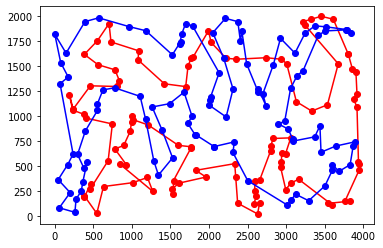

40233.39

In [676]:
cycle1, cycle2 = local_search_greedy(random_cycle1, random_cycle2, distance)
calculate_cycles_length(cycle1, cycle2, distance)